In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size. My data set contains 9 columns, 7 of them are talking about the cement block materials and what it is made of and 1 of them says the age of the cement block and the last column is the target column which defines the compressive strength of a concrete block.

# Aim:
LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the distance of error between the predicted points and the actual points in the dataset.

We would like to predict the compressive strength of a concrete block with respect to it's attirbutes.

In [115]:
df = pd.read_csv('compresive_strength_concrete2.0.csv')

In [116]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [117]:
# Changing the names of the df column to make it easier.
df.columns=['cement','blast','flyash','water','superplasticiser','coarse','fine','age','ccs']
df.head()

,cement,blast,flyash,water,superplasticiser,coarse,fine,age,ccs
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [118]:
# There is no missing values and all the values are numerical values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement              1030 non-null float64
blast               1030 non-null float64
flyash              1030 non-null float64
water               1030 non-null float64
superplasticiser    1030 non-null float64
coarse              1030 non-null float64
fine                1030 non-null float64
age                 1030 non-null int64
ccs                 1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [119]:
df

,cement,blast,flyash,water,superplasticiser,coarse,fine,age,ccs
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [120]:
# The target value we would like to predict.
target=df['ccs']

# The cement block features that we would like to train our model upon to be able to predict.
features=df.drop('ccs',axis=1)

In [121]:
# The avg cement in a block is 281, while only 181 water.
df.describe()

,cement,blast,flyash,water,superplasticiser,coarse,fine,age,ccs
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Exploratory Data Analysis.

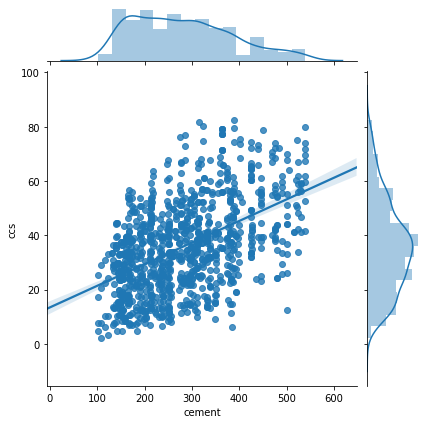

In [122]:
# Notice that there is almost a direct proportionallity between these 2 features.
# Which is obvious as cement inc. the strength of the block increases.
sns.jointplot(x='cement', y='ccs',data=df,kind='reg')

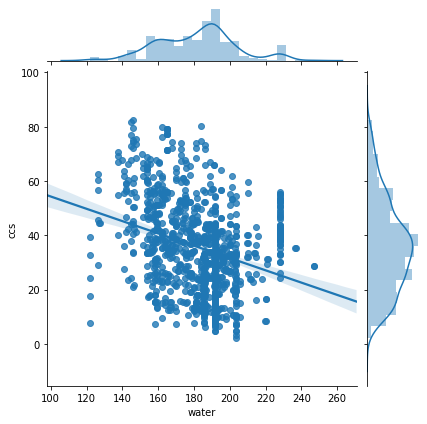

In [123]:
# Notice that there is almost a negative proportionallity between these 2 features.
# Which is obvious as water increases the strength of the block decreases.
sns.jointplot(x='water', y='ccs',data=df,kind='reg')

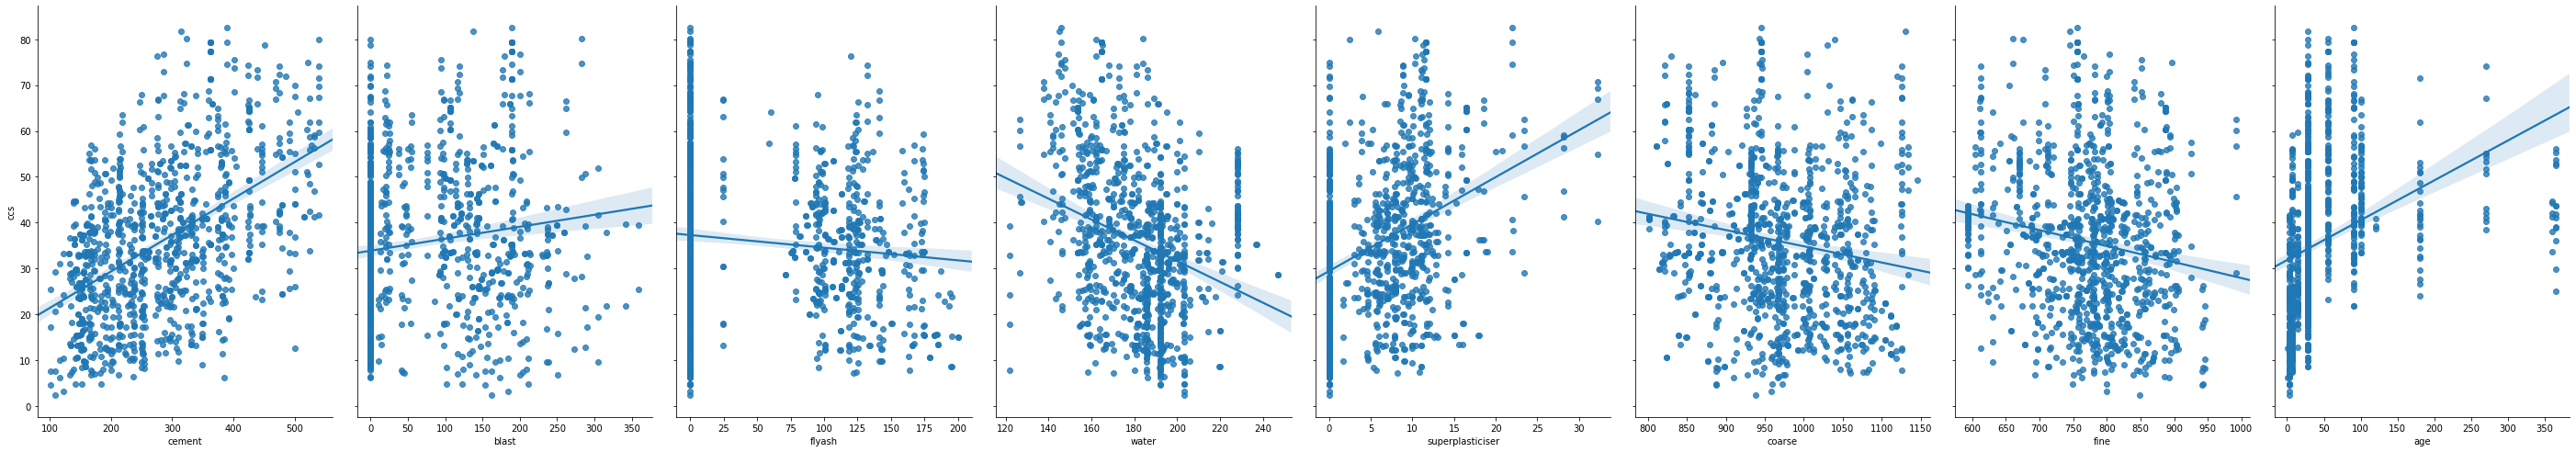

In [124]:
# visualize the relationship between the features and the response using reg plots.
sns.pairplot(df, x_vars=['cement','blast','flyash','water','superplasticiser','coarse','fine','age'], y_vars='ccs', height=7, aspect=0.7, kind='reg')

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

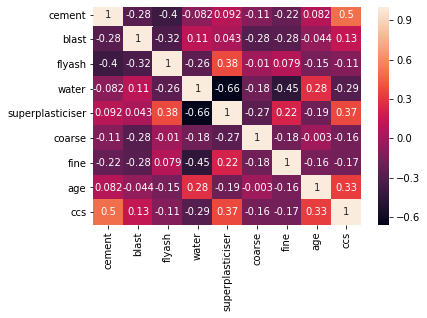

In [125]:
# Notice that the 2 features with the highest correlation is cement and css.
# While the 2 features with the highest negative correlation is super plasticiser and water.
ax = sns.heatmap(df.corr(),annot=True)
ax.set_ylim(9, 0.2)
plt.tight_layout

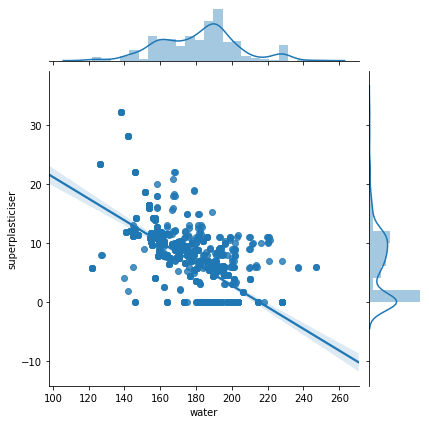

In [126]:
# While the 2 features with the highest negative correlation is super plasticiser and water.
# We can assure that by drawing a jointplot too
sns.jointplot(x='water', y='superplasticiser',data=df,kind='reg')

# Preprocessing The Data.

In [127]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate a min max scalar that puts the data between 0 and 1 for our ML model to train better.
mms = MinMaxScaler()

# fitting and transforming our dataframe columns to be scaled between 0 and 1.
scaled_features = mms.fit_transform(df)

In [128]:
# The first row containing the 8 features and the 1 target value.
scaled_features[0]

array([1.        , 0.        , 0.        , 0.32108626, 0.07763975,
       0.69476744, 0.20572002, 0.07417582, 0.96748474])

In [129]:
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)

In [130]:
# Notice here the min and max value for each column.
df_scaled.describe()

,cement,blast,flyash,water,superplasticiser,coarse,fine,age,ccs
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,0.409059,0.205609,0.270806,0.477374,0.192691,0.499764,0.450528,0.122698,0.417191
std,0.238599,0.240065,0.319825,0.170561,0.185523,0.226029,0.201144,0.173544,0.208119
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.206336,0.000000,0.000000,0.344249,0.000000,0.380814,0.343578,0.016484,0.266351
50%,0.390183,0.061213,0.000000,0.504792,0.198758,0.485465,0.465379,0.074176,0.400087
75%,0.566210,0.397746,0.591204,0.560703,0.316770,0.663953,0.577020,0.151099,0.545721
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Linear Regression Model.

In [131]:
# Numerical features to train our model on the scaled features.
X = df_scaled.drop("ccs", axis=1)

# Target feature to predict on the scaled target.
y = df_scaled["ccs"]

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
# Train test split of size 70, 30.
# Use random state to get exactly the same way of split every single time.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [134]:
from sklearn.linear_model import LinearRegression
# instantiate
lm = LinearRegression()
# Training our model on the training data(70%) with the answers given into it.
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
# If all features are held constant.
# 1 unit increase in cement value would increase the cement strength positively.
# However, 1 unit increase to water value would decrease the cement strength.
coeff_df = pd.DataFrame(data=lm.coef_,index=X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
cement,0.591169
blast,0.399442
flyash,0.188313
water,-0.277468
superplasticiser,0.101150
coarse,0.019674
fine,0.050642
age,0.544860


In [137]:
# Predicting on our test data(30%) given the new sample points in the test without the answers.
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

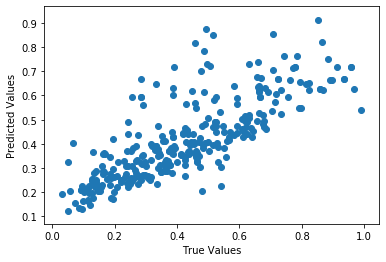

In [139]:
# Plotting our actual answers vs our predictions we made on the test samples.
# if it is a straight line this means that our predictions and the true values has the same values 
plt.scatter(y_test,predictions)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

In [140]:
from sklearn import metrics

In [141]:
# Checking our error in prediction using 3 different types of error checkers.
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.1054048765189519
MSE: 0.01825695120083309
RMSE: 0.13511828596023964


In [142]:
# This means that our model explains 62% of the variance data in our test set which is average.
metrics.explained_variance_score(y_test, predictions)

0.6203962147051261

Text(0.5, 1.0, 'Predicted cement strength with respect to cement in the block')

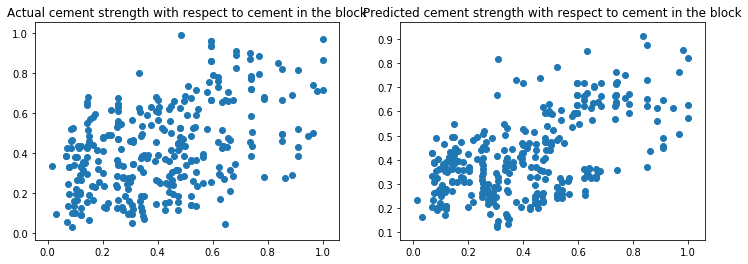

In [146]:
# We can see the amount of error between the actual and predicted values.
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(X_test['cement'], y_test)
axes[0].set_title("Actual cement strength with respect to cement in the block")

axes[1].scatter(X_test['cement'], predictions)
axes[1].set_title("Predicted cement strength with respect to cement in the block")

# Conclusion:
We notice from our data set that the most feature that is directly propotional to our target is the "Cement" and the feature with the most inversily propotional to our target is "Water".